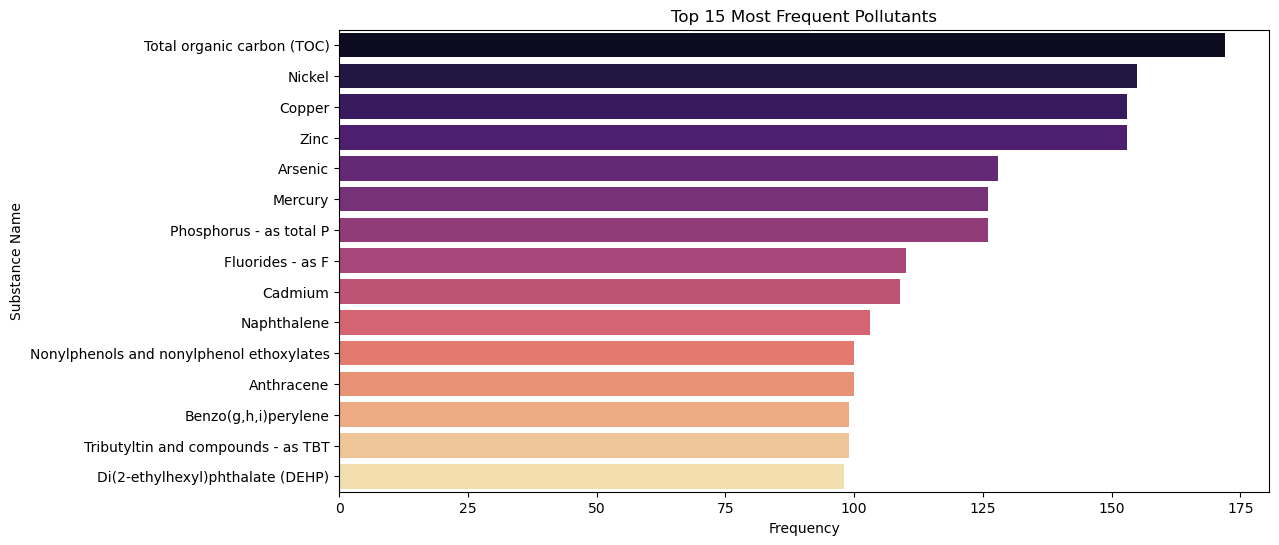

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data
file_path = "C:\\Users\\m1953\\Downloads\\pollution_no_gas_cleaned.xlsx" 
df = pd.read_excel(file_path)

# Select the SUBSTANCE NAME column and remove null values
df_substances = df[['SUBSTANCE NAME']].dropna()
substance_counts = df_substances["SUBSTANCE NAME"].value_counts()

# Plot a bar graph of the top 15 pollutants
top_n = 15 
top_substances = substance_counts.nlargest(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, hue=top_substances.index, palette="magma", legend=False)
plt.xlabel("Frequency")
plt.ylabel("Substance Name")
plt.title(f"Top {top_n} Most Frequent Pollutants")
plt.show()


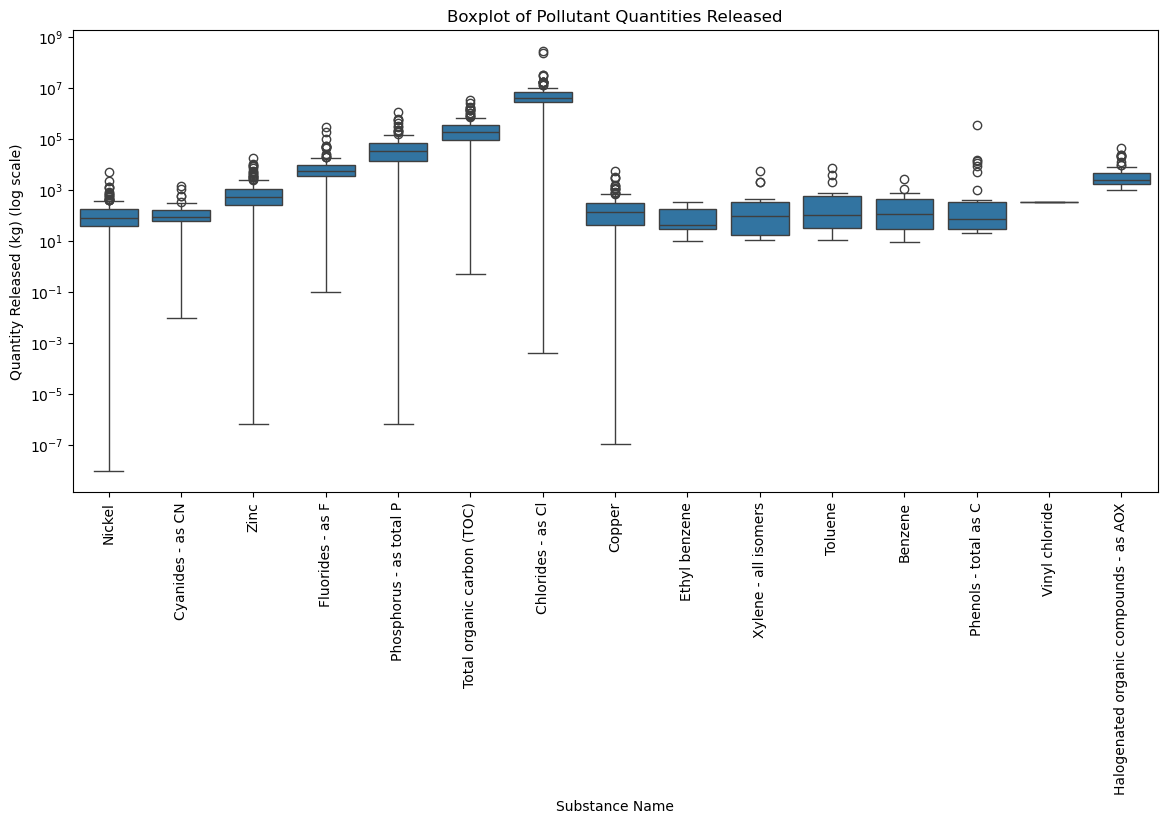

Skipping Vinyl chloride due to zero variance.


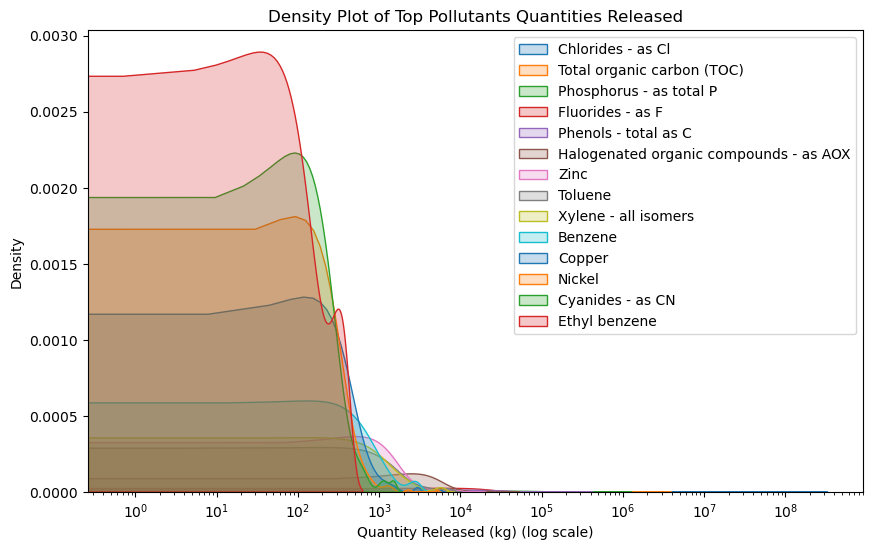

In [13]:
# Select relevant columns and remove null values
df_filtered = df[['SUBSTANCE NAME', 'QUANTITY RELEASED (kg)']].dropna()

# Count the average release of each pollutant
top_substances = df_filtered.groupby("SUBSTANCE NAME")["QUANTITY RELEASED (kg)"].mean().nlargest(15)

# Box plot of pollutant releases (detecting outliers)
plt.figure(figsize=(14, 6))
top_substance_names = top_substances.index
df_top = df_filtered[df_filtered["SUBSTANCE NAME"].isin(top_substance_names)]
sns.boxplot(x="SUBSTANCE NAME", y="QUANTITY RELEASED (kg)", data=df_top)
plt.xticks(rotation=90)
plt.yscale("log")  # Use logarithmic scale
plt.xlabel("Substance Name")
plt.ylabel("Quantity Released (kg) (log scale)")
plt.title("Boxplot of Pollutant Quantities Released")
plt.show()

# Density map of pollutant release
plt.figure(figsize=(10, 6))
for substance in top_substance_names:
    substance_data = df_filtered[df_filtered["SUBSTANCE NAME"] == substance]["QUANTITY RELEASED (kg)"]
    
    # Check if all values ​​are the same (variance is 0)
    if substance_data.nunique() > 1:
        sns.kdeplot(substance_data, label=substance, fill=True)
    else:
        print(f"Skipping {substance} due to zero variance.")
    
plt.xscale("log")
plt.xlabel("Quantity Released (kg) (log scale)")
plt.ylabel("Density")
plt.title("Density Plot of Top Pollutants Quantities Released")
plt.legend()
plt.show()